# Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles sur le site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
from os import path as pth
import requests
# Si le fichier csv des données d'incidence existe en local
# il n'est pas nécessaire de le télécharger par l'URL
local_filename = "incidence-PAY-7.csv"
if pth.exists(local_filename):
  # Le fichier existe en local dans le dossier courant
  raw_data = pd.read_csv(local_filename, skiprows=1)
else:
  # le fichier de données n'existe pas en local,
  # nous allons télécharger les données et les écrire
  # dans un fichier en local
  # Téléchargement des données
  response = requests.get(data_url)
  # Ecriture des données téléchargées dans le fichier local
  with open(local_filename, "wb") as f:
    f.write(response.content)
  raw_data = pd.read_csv(local_filename, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202437          7    604        0    1385       1           0   
1     202436          7   2180      835    3525       3           1   
2     202435          7   1620      285    2955       2           0   
3     202434          7   2560      622    4498       4           1   
4     202433          7   1971      536    3406       3           1   
5     202432          7   4399     1944    6854       7           3   
6     202431          7   4500     2213    6787       7           4   
7     202430          7   7004     4278    9730      11           7   
8     202429          7   9270     6303   12237      14          10   
9     202428          7   9364     6498   12230      14          10   
10    202427          7  10247     7090   13404      15          10   
11    202426          7  14368    10399   18337      22          16   
12    202425          7  11174     8039   14309      17          12   
13    202424          7  12621     9357   15885      19          14   
14    202423          7  14657    11339   17975      22          17   
15    202422          7  11628     8361   14895      17          12   
16    202421          7   9701     6851   12551      15          11   
17    202420          7  13661    10209   17113      20          15   
18    202419          7  10083     6413   13753      15           9   
19    202418          7  13438     9514   17362      20          14   
20    202417          7  15303    11219   19387      23          17   
21    202416          7  18138    13540   22736      27          20   
22    202415          7  24929    17315   32543      37          26   
23    202414          7  16181    12544   19818      24          19   
24    202413          7  18322    14206   22438      27          21   
25    202412          7  12818     9128   16508      19          13   
26    202411          7  15973    12400   19546      24          19   
27    202410          7  14301    10761   17841      21          16   
28    202409          7  14337    10871   17803      21          16   
29    202408          7  15899    11991   19807      24          18   
...      ...        ...    ...      ...     ...     ...         ...   
1733  199126          7  17608    11304   23912      31          20   
1734  199125          7  16169    10700   21638      28          18   
1735  199124          7  16171    10071   22271      28          17   
1736  199123          7  11947     7671   16223      21          13   
1737  199122          7  15452     9953   20951      27          17   
1738  199121          7  14903     8975   20831      26          16   
1739  199120          7  19053    12742   25364      34          23   
1740  199119          7  16739    11246   22232      29          19   
1741  199118          7  21385    13882   28888      38          25   
1742  199117          7  13462     8877   18047      24          16   
1743  199116          7  14857    10068   19646      26          18   
1744  199115          7  13975     9781   18169      25          18   
1745  199114          7  12265     7684   16846      22          14   
1746  199113          7   9567     6041   13093      17          11   
1747  199112          7  10864     7331   14397      19          13   
1748  199111          7  15574    11184   19964      27          19   
1749  199110          7  16643    11372   21914      29          20   
1750  199109          7  13741     8780   18702      24          15   
1751  199108          7  13289     8813   17765      23          15   
1752  199107          7  12337     8077   16597      22          15   
1753  199106          7  10877     7013   14741      19          12   
1754  199105          7  10442     6544   14340      18          11   
1755  199104          7   7913     4563   11263      14           8   
1756  199103          7  15387    10484   20290      27          18   
1757  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ?

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Non, il n'y a pas de données manquantes dans ce jeux de données

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [6]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Les données sont cohérentes, nous traçons le graphe représentants ces dernières sur toute la durée disponible.

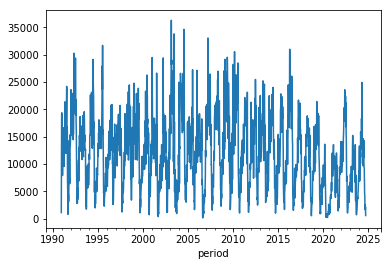

In [8]:
sorted_data['inc'].plot()

Faisons un zoom sur une plus petite partie des données pour observer leur comportement de plus près sur une période par trop étendue.

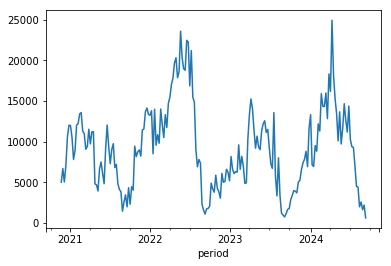

In [9]:
sorted_data['inc'][-200:].plot()

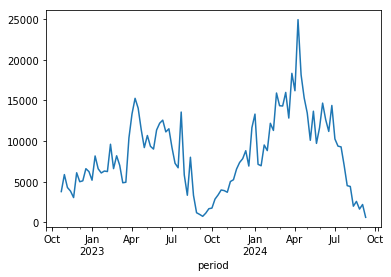

In [10]:
sorted_data['inc'][-100:].plot()

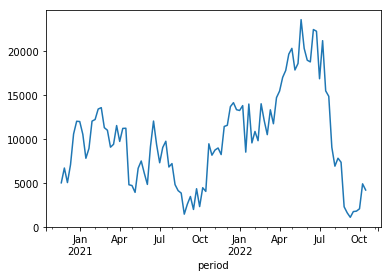

In [11]:
sorted_data['inc'][-200:-100].plot()

## Etude de l'incidence annuelle

La période creuse pour la varicelle semble plus être située sur le mois de septembre (contrairement à l'incidence de la varicelle qui semblait avoir une période creuse au mois d'août).

Pour la varicelle, le pic de l'épidémie se situe au printemps.
Cependant, son pic est bien moins marqué que celui de la grippe,
et son incidence s'étale largement entre deux années civiles.
En effet, la période creuse semble se trouver au mois de septembre.
Nous définissons donc la période de référence entre deux minima de l'incidence,
du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

In [17]:
sorted_data.index[0]

Period('1990-12-03/1990-12-09', 'W-SUN')

Encore un petit détail, comme on peut le voir ci-dessus via la première valeur de l'index du dataframe pandas qui est composé des semaines des données acquises (i.e. la semaine la plus ancienne pour laquelle les valeurs d'incidence de la varicelle ont été enregistrées), les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en septembre 1991.

In [20]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

 Voici les incidences annuelles.

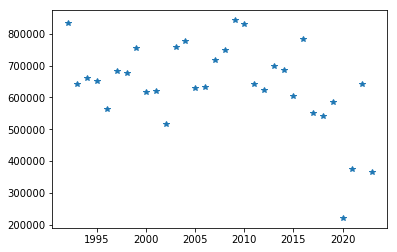

In [22]:
 yearly_incidence.plot(style='*')

 Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [23]:
 yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Une analyse rapide nous montre que l'incidence des cas de varicelles annuel est plutôt stable à travers le temps et que le nombre de cas recensés se trouve globalement entre 600000 et 800000. On peut également s'apercevoir que les plus petites incidences se retrouvent sur les années 2020, 2021 et 2023. Cette constatation nous fait directement penser à la période de COVID et aux confinements associés qui ont dus grandements freiner la propagation du virus.  

Traçons l'histogramme de ces données pour confirmer notre analyse sur la distribution de l'incidence annuel de la varicelle.

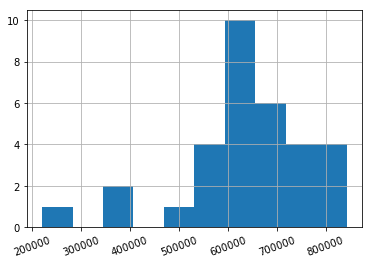

In [25]:
yearly_incidence.hist(xrot=20)

On constate bien un pique de distribution autour des 600 000 cas avec une plus grande régularité d'avoir plus de 650 000 cas que moins de 600 000. Quand aux incidences annuelles plus faibles (moins de 400 000 cas), on constate qu'elles correspondent plutôt à des situations exceptionnelles.